In [1]:
import numpy as np
import scipy as sp
import matplotlib as mpl
from numpy import sqrt, sin, cos
from matplotlib import pyplot as plt
from astropy import constants as acon
import matplotlib.ticker as ticker

In [2]:
#Settings
      
pi = sp.pi
c = acon.c.value

# Frequencies (low, high)
f0G = np.array([1.35, 3.20])     
f0  = f0G * 1e9

tau = np.linspace(10,20,11)

kB = 1.38064852e-23 # m2 kg s-2 K-1

# Wavelength 
lamda = c / f0 

# System temperature in Kelvin 
Ts = 293.15 # room temperature

#Gain
G_dB = np.array([54.75, 62.25])   
G = 10**(G_dB/10)

# Signal to noise ratio
SNR = 2.5 # threshold

# Range
#R = np.arange(200e3,2000e3,10e3) # Range in m from 200-1000 km
R = np.arange(500e3,2020e3,20e3) # Range in m from 500-2000 km

# Noise Bandwith in Hz
B = 100

# scaled object size and radar cross section
dsc = np.logspace(-2, 1, 100)
d_crit = 1/(sqrt(3)*pi)
sigma = np.where(dsc < d_crit, (dsc / d_crit)**4, 1)
dphys = dsc[:,None] * lamda
sphys = sigma[:,None] * pi * dphys**2 / 4 

# Temperature noise power 
Pn = (kB*Ts)*B

# Transmission power derived from radar equation as function of R and sphys
fi = 0

sphys_array = np.tile(sphys[:,fi],(len(R),1))
dphys_array = np.tile(dphys[:,fi],(len(R),1))
R_array = np.transpose(np.tile(R,(len(sphys[:,fi]),1)))

Pt = (SNR * (4 * pi)**3 * R_array**4 * Pn)/(sphys_array * (G[fi]**2) * (lamda[fi]**2))
Pt = Pt/1e6 # in MW


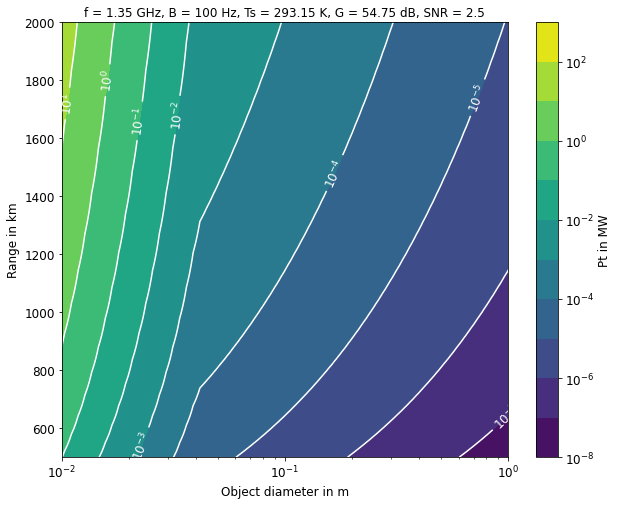

In [3]:
Y = R/1e3
X = dphys[:,fi]
XX, YY = np.meshgrid(X, Y)
levels = 10.0**np.arange(-8,4)

fmt = ticker.LogFormatterMathtext()
fmt.create_dummy_axis()

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

cp = ax.contour(XX, YY, Pt, levels=levels,colors = 'w',norm = mpl.colors.LogNorm())
plt.contourf(XX,YY,Pt,levels=levels,norm=mpl.colors.LogNorm())
ax.set_xscale('log')
plt.xlim([1e-2,1e0])
plt.ylim([500,2000])
plt.xlabel('Object diameter in m',fontsize=12)
plt.ylabel('Range in km',fontsize=12)
#plt.title('f = {f} GHz, B = 100 Hz, Ts = 293.15 K, G = 62.25 dB, SNR = 2.5'.format(f = "{:.2f}".format(f0[fi]/1e9)))
plt.title('f = {f} GHz, B = 100 Hz, Ts = 293.15 K, G = 54.75 dB, SNR = 2.5'.format(f = "{:.2f}".format(f0[fi]/1e9)))
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
cbar = plt.colorbar()
plt.clabel(cp, inline=1, fmt=fmt, fontsize=12)
cbar.set_label('Pt in MW',fontsize=12)
cbar.ax.tick_params(labelsize=12)

#plt.savefig('Pt-range_diameter_f1.pdf')
#plt.close()

In [54]:
fi = 0

#G_dB = np.array([54.75, 62.25])   
#G = 10**(G_dB/10)
#G = G[fi]

G_dB = np.arange(50,65.25,0.25)
G = 10**(G_dB/10)
r = np.arange(200e3,2020e3,20e3)
eff = 0.7

r_array = np.transpose(np.tile(r,(len(G),1)))
G_array = np.tile(G,(len(r),1))

BeamW = np.sqrt(4*eff*pi/G_array) #in radians

alt = np.arange(200e3,2020e3,20e3)
kG = 6.67259e-11
M_earth = 5.9722e24 
r_earth = acon.R_earth.value  

v = np.sqrt(kG*M_earth/(r_earth+r_array)) #velocity of object as function of altitude
s = 4 * r_array * np.tan(BeamW/2) # distance of object through beam 

t = s/v

In [56]:
Y = r/1e3
X = G_dB
XX, YY = np.meshgrid(X, Y)
levels = np.arange(0,7,0.5)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

cp = ax.contour(XX, YY, t, levels=levels,colors = 'w')
plt.contourf(XX,YY,t,levels=levels)
ax.set_xscale('log')
plt.xlim([50,65])
plt.ylim([200,2000])
plt.xlabel('Gain (dB)',fontsize=12)
plt.ylabel('Altitude in km',fontsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
cbar = plt.colorbar()
plt.clabel(cp, inline=1, fontsize=12)
cbar.set_label('time through beam in seconds',fontsize=12)
cbar.ax.tick_params(labelsize=12)

plt.savefig('t-beam_altitude.pdf')
plt.close()